# 発展課題（Python使用）
- 各遺伝子について、exon領域を “start-end,start-end,…”と出力する処理を実装。NIPBLで例示。
- 遺伝子のタイプごとにexon数をカウントし、分布をヒストグラムで表示する。

- (とりあえずここまで)

- それぞれの遺伝子ファイルについて、「何らかの方法で」遺伝子の重複を除いた修正ファイルを作成する。
- ２つの遺伝子ファイル間で共通する遺伝子、共通でない遺伝子がいくつ存在するかカウントする。
- ２つの遺伝子ファイル間で共通する遺伝子について、 refFlat.hg38.txtにgene typeの列を追加したファイルを作成する。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### 各遺伝子について、exon領域を “start-end,start-end,…”と出力する処理を実装。NIPBLで例示。

In [2]:
UCSC = pd.read_table("refFlat.hg38.txt", skiprows=1, names=('geneName', 'name', 'chrom', 'strand', 'txStart', 'txEnd', 'cdsStart', 'cdsEnd', 'exonCount', 'exonStarts', 'exonEnds'))
UCSC
# そのまま読み込むと、はじめのカラムが#geneNameという名前になってしまう。
# そこで、header部分は読み込まず、namesを使って自分で付けることにした。

,geneName,name,chrom,strand,txStart,txEnd,cdsStart,cdsEnd,exonCount,exonStarts,exonEnds
0,DDX11L1,NR_046018,chr1,+,11873,14409,14409,14409,3,"11873,12612,13220,","12227,12721,14409,"
1,WASH7P,NR_024540,chr1,-,14361,29370,29370,29370,11,"14361,14969,15795,16606,16857,17232,17605,1791...","14829,15038,15947,16765,17055,17368,17742,1806..."
2,MIR6859-1,NR_106918,chr1,-,17368,17436,17436,17436,1,"17368,","17436,"
3,MIR6859-2,NR_107062,chr1,-,17368,17436,17436,17436,1,"17368,","17436,"
4,MIR6859-3,NR_107063,chr1,-,17368,17436,17436,17436,1,"17368,","17436,"
...,...,...,...,...,...,...,...,...,...,...,...
82495,DGCR6,NM_005675,chr22_KI270734v1_random,+,131590,137393,131645,136994,5,"131590,131835,135442,136158,136844,","131755,131996,135543,136299,137393,"
82496,LOC102724788,NM_001368249,chr22_KI270734v1_random,-,137997,161852,138479,161586,15,"137997,138742,142193,143613,144748,145003,1466...","138667,138831,142292,143789,144895,145096,1467..."
82497,LOC102724788,NM_001368250,chr22_KI270734v1_random,-,137997,161592,138479,156446,14,"137997,138742,142193,143613,144748,145003,1466...","138667,138831,142292,143789,144895,145096,1467..."
82498,PRODH,NM_016335,chr22_KI270734v1_random,-,138085,161852,138479,161586,15,"138085,138742,142193,143613,144748,145003,1466...","138667,138831,142292,143789,144895,145096,1467..."


In [3]:
# "geneName" 列の値が NIPBLと一致する行をdfとして取得。
# .copy()にしないと、attribute errorとなる。
NIPBL_UCSC_df = UCSC.query("geneName == 'NIPBL'").copy()
NIPBL_UCSC_df

# cdsEndの異なる二種類が表示される

,geneName,name,chrom,strand,txStart,txEnd,cdsStart,cdsEnd,exonCount,exonStarts,exonEnds
19085,NIPBL,NM_015384,chr5,+,36876768,37065819,36953696,37064023,46,"36876768,36953617,36955471,36958103,36961483,3...","36877178,36953760,36955637,36958231,36961583,3..."
19086,NIPBL,NM_133433,chr5,+,36876768,37066413,36953696,37064892,47,"36876768,36953617,36955471,36958103,36961483,3...","36877178,36953760,36955637,36958231,36961583,3..."


In [4]:
# exonStartsごとに、","で分割してみる。仮の"SplitStars"に値を入力。
NIPBL_UCSC_df["SplitStars"] = NIPBL_UCSC_df["exonStarts"].str.split(",")
NIPBL_UCSC_df["SplitStars"] 

19085    [36876768, 36953617, 36955471, 36958103, 36961...
19086    [36876768, 36953617, 36955471, 36958103, 36961...
Name: SplitStars, dtype: object

In [5]:
# exonEndsごとに、","で分割してみる。仮の"SplitEnds"に値を入力。
NIPBL_UCSC_df["SplitEnds"] = NIPBL_UCSC_df["exonEnds"].str.split(",")
NIPBL_UCSC_df["SplitEnds"] 

19085    [36877178, 36953760, 36955637, 36958231, 36961...
19086    [36877178, 36953760, 36955637, 36958231, 36961...
Name: SplitEnds, dtype: object

In [6]:
# exon1の開始点は.str.get(0)で取得できる
NIPBL_UCSC_df["exon1"] = NIPBL_UCSC_df["SplitStars"].str.get(0)
NIPBL_UCSC_df["exon1"]

19085    36876768
19086    36876768
Name: exon1, dtype: object

In [7]:
# exon2の開始点は.str.get(1)で取得できる
NIPBL_UCSC_df["exon2"] = NIPBL_UCSC_df["SplitStars"].str.get(1)
NIPBL_UCSC_df["exon2"]

19085    36953617
19086    36953617
Name: exon2, dtype: object

In [8]:
# exonCountsを取り出す方法
print(NIPBL_UCSC_df.at[19085, 'exonCount'])

46


In [9]:
# for文で、exonCountsの数だけstart-endを表示する

for i in range((NIPBL_UCSC_df.at[19086, 'exonCount'])): #19086行のほうが多いのでこちらを使用
    print ("exon"+ str (i+1))
    print(NIPBL_UCSC_df["SplitStars"].str.get(i) + "-" + NIPBL_UCSC_df["SplitEnds"].str.get(i))

exon1
19085    36876768-36877178
19086    36876768-36877178
dtype: object
exon2
19085    36953617-36953760
19086    36953617-36953760
dtype: object
exon3
19085    36955471-36955637
19086    36955471-36955637
dtype: object
exon4
19085    36958103-36958231
19086    36958103-36958231
dtype: object
exon5
19085    36961483-36961583
19086    36961483-36961583
dtype: object
exon6
19085    36962122-36962274
19086    36962122-36962274
dtype: object
exon7
19085    36970875-36971036
19086    36970875-36971036
dtype: object
exon8
19085    36971944-36972041
19086    36971944-36972041
dtype: object
exon9
19085    36975775-36976402
19086    36975775-36976402
dtype: object
exon10
19085    36984675-36986301
19086    36984675-36986301
dtype: object
exon11
19085    36995621-36995804
19086    36995621-36995804
dtype: object
exon12
19085    37000372-37000570
19086    37000372-37000570
dtype: object
exon13
19085    37000816-37000888
19086    37000816-37000888
dtype: object
exon14
19085    37000988-37001078


- 最低限こなしたが
- 19085行と19086行に分けたほうがいいかも知れない
- 出力を","でつないで、一行で出すべきだったかも

### 遺伝子のタイプごとにexon数をカウントし、分布をヒストグラムで表示する。

In [10]:
# typeのあるデータEnsemblを読み込む
Ensembl = pd.read_table("refFlat.GRCh38.gene.name.txt", names=('geneName', 'name', 'chrom', 'strand', 'txStart', 'txEnd', 'cdsStart', 'cdsEnd', 'exonCount', 'exonStarts', 'exonEnds', 'geneType', 'type'))
# Ensemblにはheaderがないので、names = でheaderを指定
Ensembl

,geneName,name,chrom,strand,txStart,txEnd,cdsStart,cdsEnd,exonCount,exonStarts,exonEnds,geneType,type
0,AC026150.3,AC026150.3-201,chr15,-,30607695,30608193,30607695,30608193,1,"30607695,","30608193,",lncRNA,lncRNA
1,AC023302.1,AC023302.1-201,chr15,-,80693216,80693707,80693216,80693707,1,"80693216,","80693707,",lncRNA,lncRNA
2,RNU6-380P,RNU6-380P-201,chr15,+,80663772,80663878,80663772,80663878,1,"80663772,","80663878,",snRNA,snRNA
3,AC108451.1,AC108451.1-201,chr15,-,80554609,80562944,80554609,80562944,3,"80562862,80560056,80554609,","80562944,80560167,80556933,",lncRNA,lncRNA
4,OR4F6,OR4F6-201,chr15,+,101803509,101806887,101805720,101806658,2,"101803509,101805687,","101803545,101806887,",protein_coding,protein_coding
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60553,AC131281.1,AC131281.1-201,chr8,-,202660,202897,202660,202897,2,"202822,202660,","202897,202747,",unprocessed_pseudogene,unprocessed_pseudogene
60554,AC104233.1,AC104233.1-203,chr8,-,121668934,121697562,121668934,121697562,4,"121697511,121684485,121680277,121668934,","121697562,121684603,121680441,121669214,",lncRNA,lncRNA
60555,DEFB109A,DEFB109A-201,chr8,-,12393209,12400366,12393209,12400366,2,"12400308,12393209,","12400366,12393414,",unprocessed_pseudogene,unprocessed_pseudogene
60556,AC091047.1,AC091047.1-201,chr8,+,69713390,69719722,69713390,69719722,3,"69713390,69714848,69719677,","69713818,69714924,69719722,",lncRNA,lncRNA


In [11]:
Ensembl_s = Ensembl.sort_values(['type']) # typeごとにソートする
grouped = Ensembl_s[["type", "exonCount"]] # 必要な部分のみ取り出す
grouped

,type,exonCount
54809,IG_C_gene,1
6147,IG_C_gene,5
54356,IG_C_gene,1
6396,IG_C_gene,9
6150,IG_C_gene,6
...,...,...
58641,unprocessed_pseudogene,2
20963,unprocessed_pseudogene,1
50729,unprocessed_pseudogene,1
54948,unprocessed_pseudogene,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a14877210>,
      dtype=object)

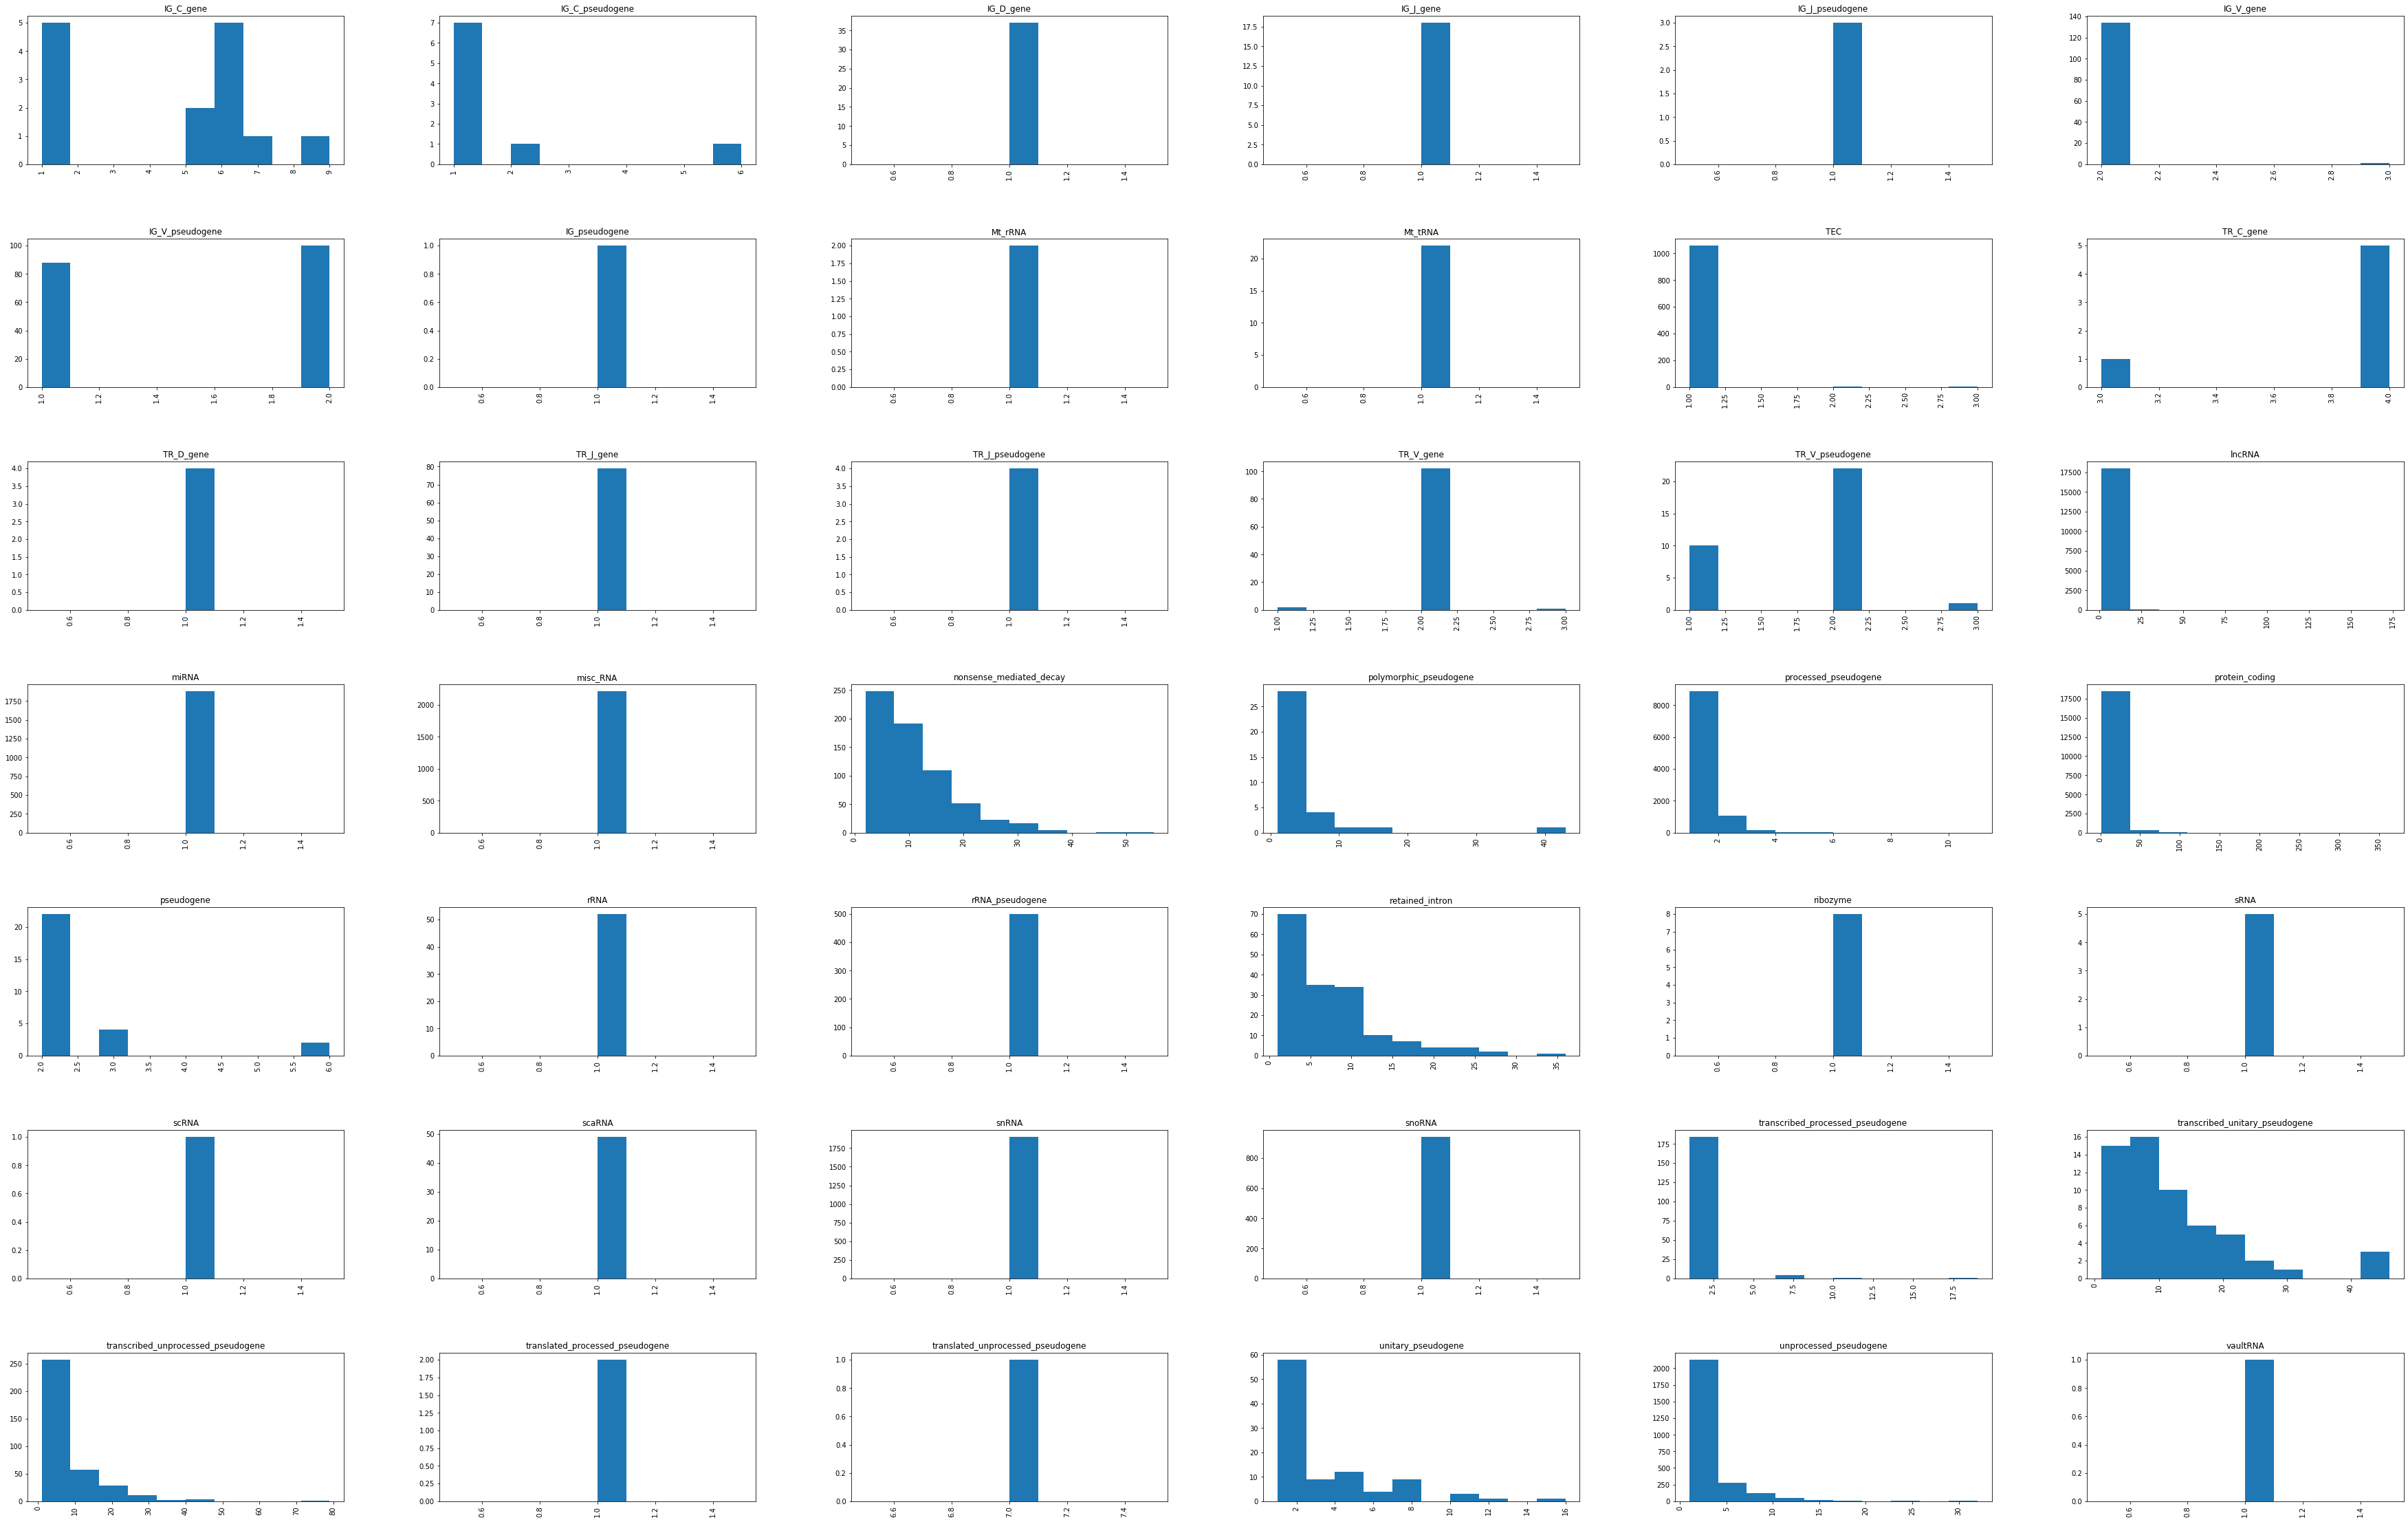

In [12]:
grouped.hist(by="type", figsize=(60, 40))

- 最低限こなしたが
- 見づらい
- 42種類多すぎ

- lncRNA
- miRNA
- protein_coding
- の３つくらいでいいかも

### それぞれの遺伝子ファイルについて、「何らかの方法で」遺伝子の重複を除いた修正ファイルを作成する。

- 重複の原因はisoformなど。
- 最も良いのは、代表的な転写産物を残すこと（最も広く発現している、最も発現量が多い）だが、それは知る由もない。
- 次善の策として、最も長い転写産物が機能を持っていそう、、、ということで、「長いものを残す」。

In [13]:
# "geneName" 列の値が NIPBLと一致する行を表示
NIPBL_Ensembl_df = Ensembl.query('geneName == "NIPBL"')
NIPBL_Ensembl_df
# Ensemblは代表的なIsoformを抜き出しているので、１行のみ

,geneName,name,chrom,strand,txStart,txEnd,cdsStart,cdsEnd,exonCount,exonStarts,exonEnds,geneType,type
57386,NIPBL,NIPBL-201,chr5,+,36876769,37066413,36953697,37064892,47,"36876769,36953618,36955472,36958104,36961484,3...","36877178,36953760,36955637,36958231,36961583,3...",protein_coding,protein_coding
